In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

from matplotlib import rc, rcParams, font_manager 
#!find / -name "*Nanum*.ttf"
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf'
fontName = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=fontName)

import seaborn as sns
from sklearn.datasets import load_wine, load_iris
import warnings 
warnings.filterwarnings('ignore')

pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)

---

### 계층적 군집분석

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 

US = pd.read_csv('ADP_book_ver01/data/USArrests.csv')
US.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
labelList = US.State.tolist() 
US.tail()

,State,Murder,Assault,UrbanPop,Rape
45,Virginia,8.50,156,63,20.70
46,Washington,4.00,145,73,26.20
47,West Virginia,5.70,81,39,9.30
48,Wisconsin,2.60,53,66,10.80
49,Wyoming,6.80,161,60,15.60


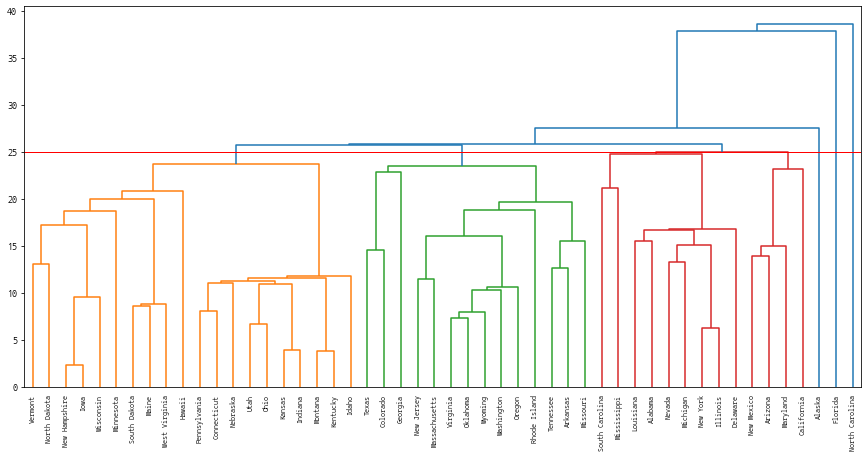

In [5]:
# 최단연결법 
single = linkage(US.iloc[:, 1:], metric='euclidean', method='single')

plt.figure(figsize=(15,7))
dendrogram(single, 
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           color_threshold=25,
           show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1)
plt.show()

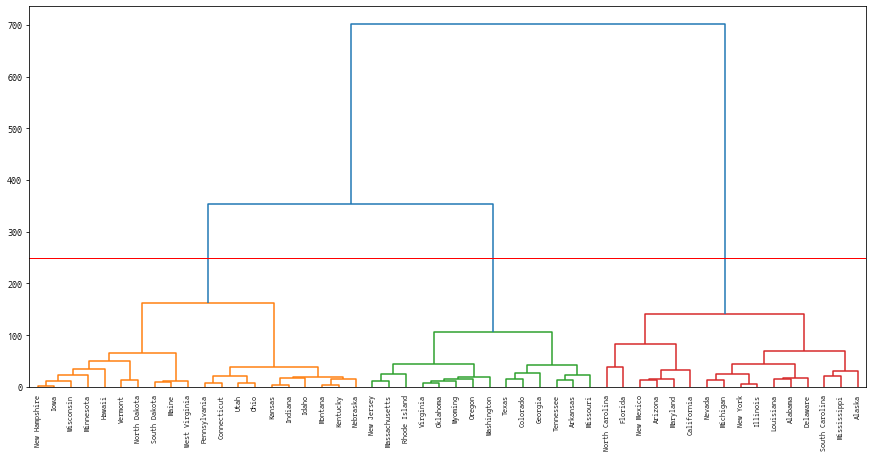

In [6]:
# 와드 연결법
ward = linkage(US.iloc[:, 1:], metric='euclidean', method='ward')

plt.figure(figsize=(15,7))
dendrogram(ward,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           color_threshold=250,    # 클러스터 구분 기준값
           show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)
plt.show()

In [7]:
# 데이터에 군집 배정
US['cluster'] = fcluster(ward, t=250, criterion='distance')  # t는 클러스터 구분 기준값
US.tail(3)

,State,Murder,Assault,UrbanPop,Rape,cluster
47,West Virginia,5.70,81,39,9.30,3
48,Wisconsin,2.60,53,66,10.80,3
49,Wyoming,6.80,161,60,15.60,2


---

### 비계층적 군집분석

In [8]:
iris = pd.read_csv('ADP_book_ver01/data/iris.csv')
X = iris.drop('target', axis=1)
X.tail()

,sepal length,sepal width,petal length,petal width
145,6.70,3.00,5.20,2.30
146,6.30,2.50,5.00,1.90
147,6.50,3.00,5.20,2.00
148,6.20,3.40,5.40,2.30
149,5.90,3.00,5.10,1.80


In [9]:
# 클러스터별 콜린스키 하라비츠 결과 : 최적 세그먼트 수 (최고 스코어값으로 선택)
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score 

for k in range(2,10): 
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(k, calinski_harabasz_score(X, labels))

2 513.3038433517568
3 560.3999242466402
4 529.1207190840455
5 494.0943819140986
6 474.51742958716295
7 448.8714494416451
8 436.61302488142496
9 414.5303174051382


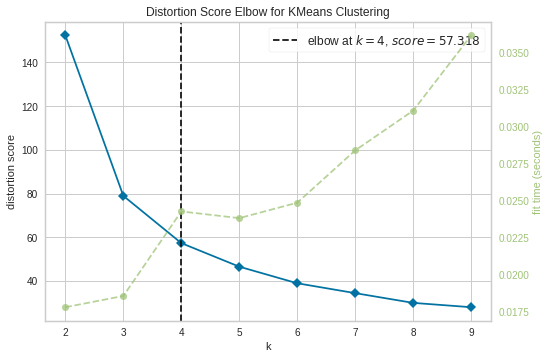

In [14]:
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
vis = KElbowVisualizer(model, k=(2,10)) # 엘보메쏘드 
vis.fit(X)
vis.show();

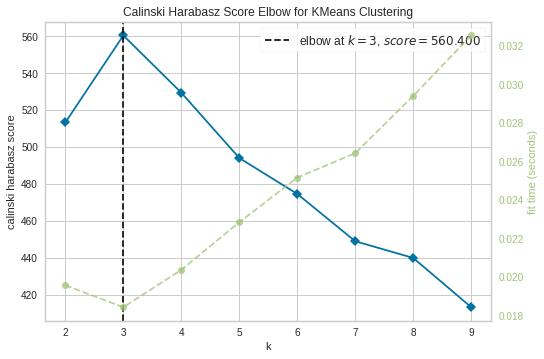

In [16]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
vis = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')
vis.fit(X)
vis.show();

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f864ebae8b0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f864ebae8b0>
Traceback 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f864ebae8b0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


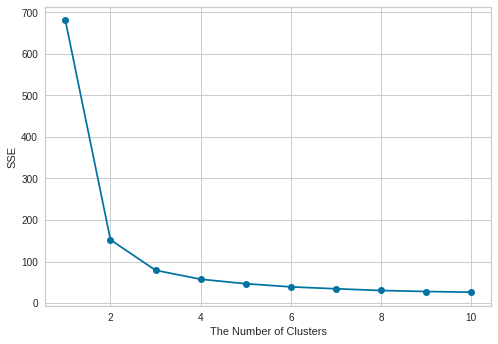

In [24]:
# 촌스러운 엘보메소드 
sse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(X)
    sse.append(km.inertia_)

plt.plot(range(1,11), sse, marker='o')
plt.xlabel('The Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [40]:
# 최적 k로 군집화, 프로파일링(히트맵)
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

iris['cluster'] = km.labels_
print(iris['cluster'].value_counts())
res = iris.groupby(['cluster']).mean()
res

0    62
1    50
2    38
Name: cluster, dtype: int64


,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.90,2.75,4.39,1.43
1,5.01,3.42,1.46,0.24
2,6.85,3.07,5.74,2.07


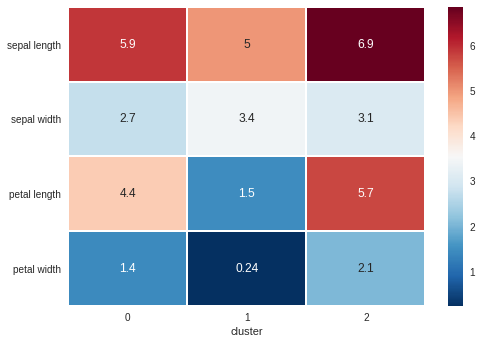

In [35]:
ax = sns.heatmap(res.T, cmap='RdBu_r', linewidth=1, linecolor='white', annot=True)
plt.setp(ax.get_yticklabels(), ha="right", rotation=0);  # ytickslabel 90도 변환되어 있어 조정 

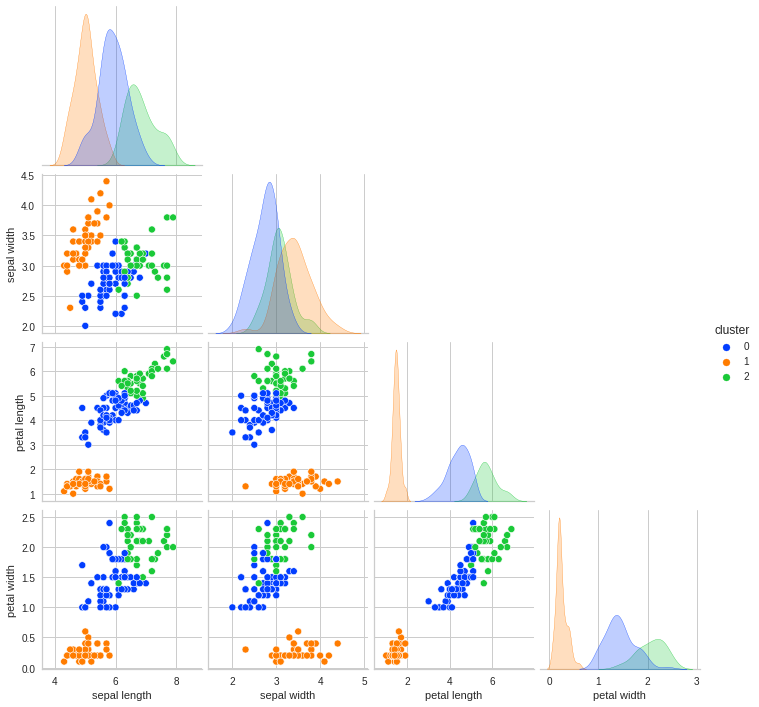

In [37]:
sns.pairplot(iris, diag_kind='kde', hue='cluster', corner='True', palette='bright');

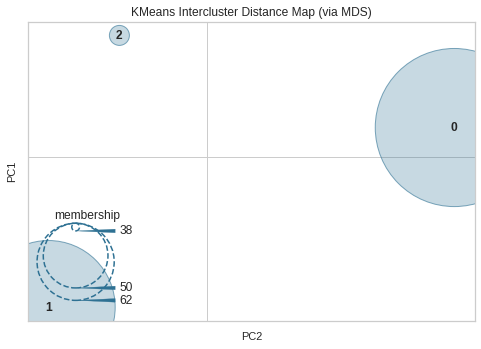

In [39]:
# https://www.scikit-yb.org/en/latest/api/cluster/icdm.html
""" 
- 클러스터의 상대적 위치와 사이즈를 2차원 차트로 시각화  
Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. 
E.g. the closer to centers are in the visualization, the closer they are in the original feature space. 
The clusters are sized according to a scoring metric. 
By default, they are sized by membership, e.g. the number of instances that belong to each center. 
This gives a sense of the relative importance of clusters. 
Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.
"""

from yellowbrick.cluster import InterclusterDistance

vis = InterclusterDistance(km).fit(X)
vis.show();  

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f863df551f0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


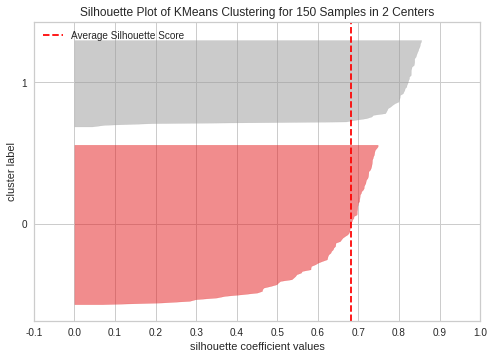

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f864eeb8ca0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


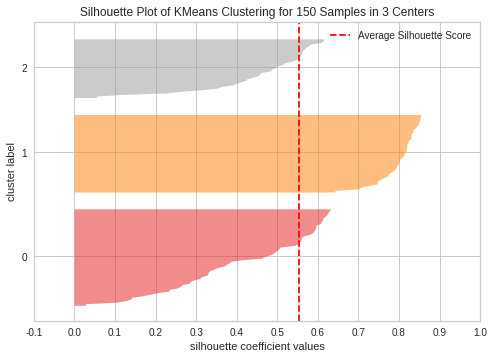

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8637cc5af0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


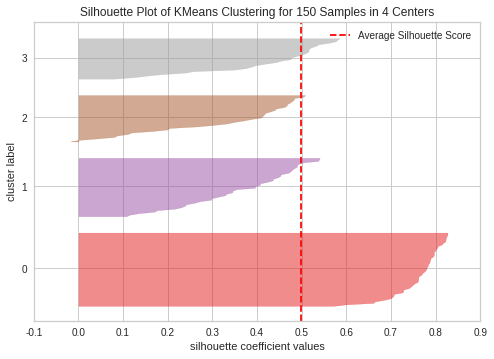

In [43]:
# 실루엣 계수 
# -1 (부실)  ~ 1(최적) 사이값 
# 분류된 클러스터가 1에 가깝고, 기울기가 가파르게 떨이지지 않을수록 좋다. 
# https://studying-haeung.tistory.com/13
from yellowbrick.cluster import SilhouetteVisualizer

km2 = KMeans(n_clusters=2, random_state=42)
km3 = KMeans(n_clusters=3, random_state=42)
km4 = KMeans(n_clusters=4, random_state=42)

vis2 = SilhouetteVisualizer(km2, color='yellowbrick').fit(X)
vis2.show();

vis3 = SilhouetteVisualizer(km3, color='yellowbrick').fit(X)
vis3.show();

vis4 = SilhouetteVisualizer(km4, color='yellowbrick').fit(X)
vis4.show();

---

### 혼합 분포

- 정규분포로 적합 >> 반드시 데이터 표준화 
- inertia에 제공되지 않음 -> 적정 군집수 탐색 방법 활용 안됨 
- 엘보메소드, 실루엣계수 등 활용 못함

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture 

iris = pd.read_csv('ADP_book_ver01/data/iris.csv')
df = iris.drop('target', axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

gmm = GaussianMixture(n_components=3)  # n_clusters가 아니라, n_components임 
gmm.fit(df_scaled) 
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
df['gmm_cluster'] = gmm_labels 
res = df.groupby('gmm_cluster').mean()
res

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,6.55,2.95,5.49,1.99
1,5.01,3.42,1.46,0.24
2,5.90,2.78,4.19,1.29


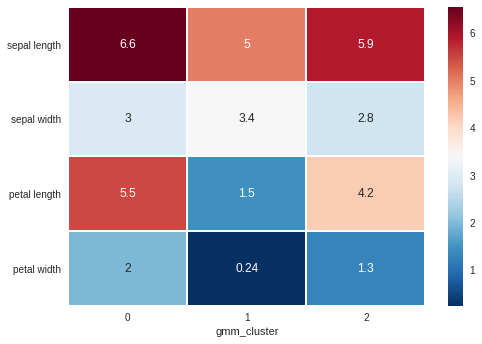

In [48]:
ax = sns.heatmap(res.T, cmap='RdBu_r', linewidth=1, linecolor='white', annot=True)
plt.setp(ax.get_yticklabels(), ha="right", rotation=0);  # ytickslabel 90도 변환되어 있어 조정 

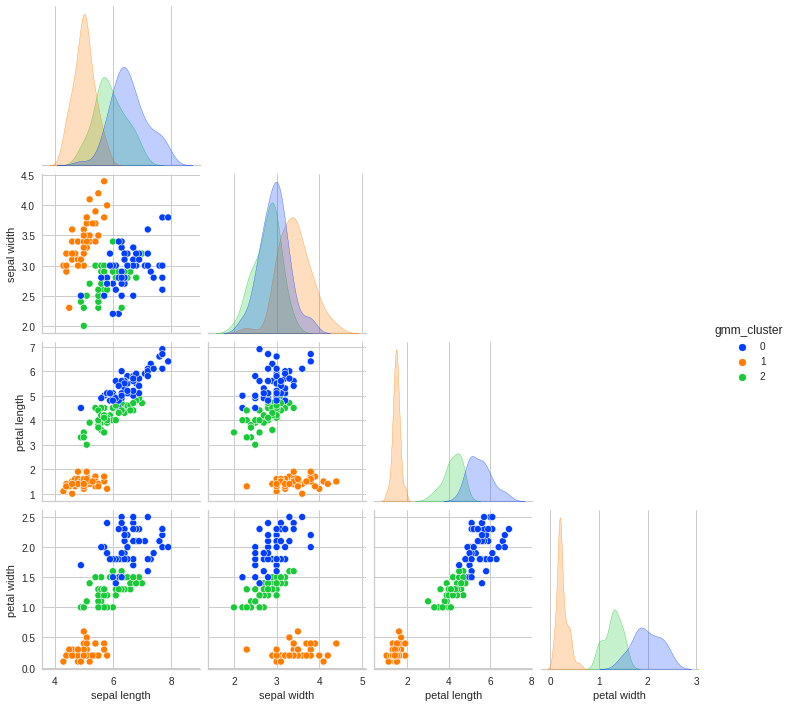

In [50]:
sns.pairplot(df, diag_kind='kde', hue='gmm_cluster', corner='True', palette='bright');

In [61]:
aic_list = []
for i in np.arange(2,10):
    gmm = GaussianMixture(n_components=i)  # n_clusters가 아니라, n_components임 
    gmm.fit(df_scaled)
    aic_list.append(gmm.aic(df_scaled))
    print(i, gmm.aic(df_scaled))  # 계속 줄어들기만 함 못쓸듯 

2 710.3772967620362
3 672.058161386686
4 679.0077103208964
5 678.0602025055582
6 674.9061500107517
7 635.646121411373
8 674.7957135919338
9 600.6239679942582


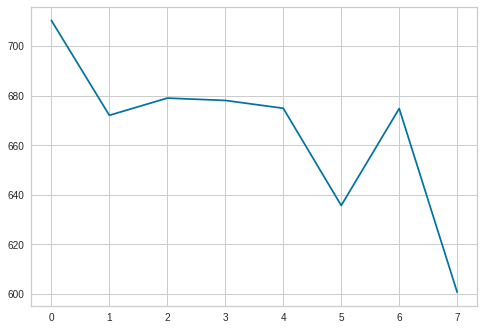

In [64]:
plt.plot(aic_list);

---

### DBScan 

- DBSCAN(Density Based Spatial Clustering of Applications with Noise) : 밀도 기반 군집화 알고리즘이다.
- 특정 공간 내에 데이터 밀도 차이 기반, 복잡한 기하학적 분포를 가진 데이터에도 군집화를 잘 수행
- DBSCAN 주요 파라미터
  - 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
  - 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 갯수
  - 클러스터 결과에서 -1은 outlier를 의미 
- 장단점 (https://pizzathief.oopy.io/dbscan)
  - 클러스터 갯수 지정 불필요, 이상치 효과적으로 제거 
  - 클러스터 전 반드시 데이터 스케일링 필요

In [67]:
# https://bit.ly/3Av9vz8

iris = pd.read_csv('ADP_book_ver01/data/iris.csv')
iris.tail(3)  # 원래는 스케일링 필요

,sepal length,sepal width,petal length,petal width,target
147,6.50,3.00,5.20,2.00,Iris-virginica
148,6.20,3.40,5.40,2.30,Iris-virginica
149,5.90,3.00,5.10,1.80,Iris-virginica


In [70]:
from sklearn.cluster import DBSCAN 

#DBSCAN?
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.drop('target', axis=1))

In [72]:
iris['cluster'] = dbscan_labels
pd.crosstab(iris['target'], iris['cluster'])  # cluster id 중 -1은 아웃라이어

cluster,-1,0,1
target,,,
Iris-setosa,1,49,0
Iris-versicolor,4,0,46
Iris-virginica,8,0,42


In [78]:
# 결과 시각화 
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
iris_pca = pca.fit_transform(iris.drop(['target', 'cluster'], axis=1))

iris['pca1'] = iris_pca[:,0]
iris['pca2'] = iris_pca[:,1]

In [79]:
iris.head()

,sepal length,sepal width,petal length,petal width,target,cluster,pca1,pca2
0,5.10,3.50,1.40,0.20,Iris-setosa,0,-2.68,0.46
1,4.90,3.00,1.40,0.20,Iris-setosa,0,-2.72,-0.24
2,4.70,3.20,1.30,0.20,Iris-setosa,0,-2.89,-0.19
3,4.60,3.10,1.50,0.20,Iris-setosa,0,-2.75,-0.44
4,5.00,3.60,1.40,0.20,Iris-setosa,0,-2.73,0.47


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

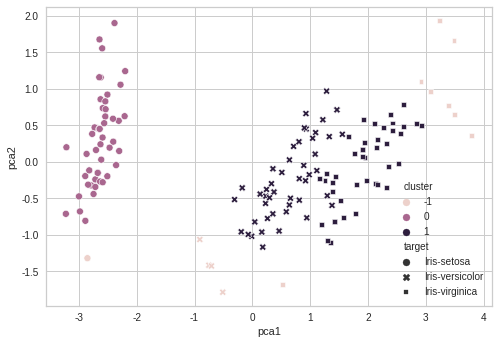

In [85]:
sns.scatterplot(x='pca1', y='pca2', hue='cluster', style='target', data=iris); 
# 4차원 
# DBSCAN은 크게 2개 세그먼트로 분류하고, 아웃라이어는 -1로 처리

In [86]:
# 2번째 샘플
df = pd.read_csv('ADP_book_ver01/data/breast-cancer.csv').drop('id', axis=1)
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,"1,479.00",0.11,0.12,0.24,0.14,0.17,0.06,1.18,1.26,7.67,158.70,0.01,0.03,0.05,0.02,0.01,0.00,25.45,26.40,166.10,"2,027.00",0.14,0.21,0.41,0.22,0.21,0.07
565,M,20.13,28.25,131.20,"1,261.00",0.10,0.10,0.14,0.10,0.18,0.06,0.77,2.46,5.20,99.04,0.01,0.02,0.04,0.02,0.02,0.00,23.69,38.25,155.00,"1,731.00",0.12,0.19,0.32,0.16,0.26,0.07
566,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,0.46,1.07,3.42,48.55,0.01,0.04,0.05,0.02,0.01,0.00,18.98,34.12,126.70,"1,124.00",0.11,0.31,0.34,0.14,0.22,0.08
567,M,20.60,29.33,140.10,"1,265.00",0.12,0.28,0.35,0.15,0.24,0.07,0.73,1.59,5.77,86.22,0.01,0.06,0.07,0.02,0.02,0.01,25.74,39.42,184.60,"1,821.00",0.17,0.87,0.94,0.27,0.41,0.12
568,B,7.76,24.54,47.92,181.00,0.05,0.04,0.00,0.00,0.16,0.06,0.39,1.43,2.55,19.15,0.01,0.00,0.00,0.00,0.03,0.00,9.46,30.37,59.16,268.60,0.09,0.06,0.00,0.00,0.29,0.07


In [88]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN 

sts = StandardScaler()
df_scaled = pd.DataFrame(sts.fit_transform(df.drop('diagnosis', axis=1)), columns=df.columns[1:])
df_scaled.tail(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
566,0.70,2.05,0.67,0.58,-0.84,-0.04,0.05,0.11,-0.81,-0.90,0.18,-0.26,0.28,0.18,-0.38,0.66,0.51,0.61,-0.89,0.04,0.56,1.37,0.58,0.43,-0.81,0.35,0.33,0.41,-1.10,-0.32
567,1.84,2.34,1.98,1.74,1.53,3.27,3.30,2.66,2.14,1.04,1.16,0.69,1.44,1.01,-0.17,2.02,1.30,0.79,0.33,0.90,1.96,2.24,2.30,1.65,1.43,3.90,3.20,2.29,1.92,2.22
568,-1.81,1.22,-1.81,-1.35,-3.11,-1.15,-1.11,-1.26,-0.82,-0.56,-0.07,0.38,-0.16,-0.47,0.05,-1.16,-1.06,-1.91,0.75,-0.38,-1.41,0.76,-1.43,-1.08,-1.86,-1.21,-1.31,-1.75,-0.05,-0.75


In [103]:
for e in [0.5, 1, 1.5, 2, 2.5,3]:
    dbscan = DBSCAN(eps=e)    # 입실론값 계속 조정해봐야 함 ㅠ.ㅜ
    dbscan_labels = dbscan.fit_predict(df_scaled)
    print("eps=",e)
    print(pd.Series(dbscan_labels).value_counts())
    print('='*50)

eps= 0.5
-1    569
dtype: int64
eps= 1
-1    569
dtype: int64
eps= 1.5
-1    550
 0     19
dtype: int64
eps= 2
-1    371
 1    181
 0     12
 2      3
 3      2
dtype: int64
eps= 2.5
 0    340
-1    224
 1      5
dtype: int64
eps= 3
 0    448
-1    121
dtype: int64


In [104]:
for e in np.arange(1.5, 3, 0.25):
    dbscan = DBSCAN(eps=e)    # 입실론값 계속 조정해봐야 함 ㅠ.ㅜ
    dbscan_labels = dbscan.fit_predict(df_scaled)
    print("eps=",e)
    print(pd.Series(dbscan_labels).value_counts())
    print('='*50)    # target이 2개 그룹(양성,음성)인 점을 감안하여, 입실론은 2.5로 확정 

eps= 1.5
-1    550
 0     19
dtype: int64
eps= 1.75
-1    478
 0     91
dtype: int64
eps= 2.0
-1    371
 1    181
 0     12
 2      3
 3      2
dtype: int64
eps= 2.25
-1    293
 1    244
 0     19
 2     10
 3      3
dtype: int64
eps= 2.5
 0    340
-1    224
 1      5
dtype: int64
eps= 2.75
 0    397
-1    172
dtype: int64


In [106]:
dbscan = DBSCAN(eps=2.5)    # 입실론값 계속 조정해봐야 함 ㅠ.ㅜ
dbscan_labels = dbscan.fit_predict(df_scaled)

df['cluster'] = dbscan_labels 

In [107]:
# 결과 시각화 
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df.drop(['diagnosis', 'cluster'], axis=1))

df['pca1'] = df_pca[:,0]
df['pca2'] = df_pca[:,1]

In [109]:
df.tail(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster,pca1,pca2
566,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,0.46,1.07,3.42,48.55,0.01,0.04,0.05,0.02,0.01,0.00,18.98,34.12,126.70,"1,124.00",0.11,0.31,0.34,0.14,0.22,0.08,-1,314.50,47.55
567,M,20.60,29.33,140.10,"1,265.00",0.12,0.28,0.35,0.15,0.24,0.07,0.73,1.59,5.77,86.22,0.01,0.06,0.07,0.02,0.02,0.01,25.74,39.42,184.60,"1,821.00",0.17,0.87,0.94,0.27,0.41,0.12,-1,"1,124.86",34.13
568,B,7.76,24.54,47.92,181.00,0.05,0.04,0.00,0.00,0.16,0.06,0.39,1.43,2.55,19.15,0.01,0.00,0.00,0.00,0.03,0.00,9.46,30.37,59.16,268.60,0.09,0.06,0.00,0.00,0.29,0.07,-1,-771.53,-88.64


In [115]:
pd.crosstab(df['diagnosis'], df['cluster'])  # cluster id 중 -1은 아웃라이어

cluster,-1,0,1
diagnosis,,,
B,85,272,0
M,139,68,5


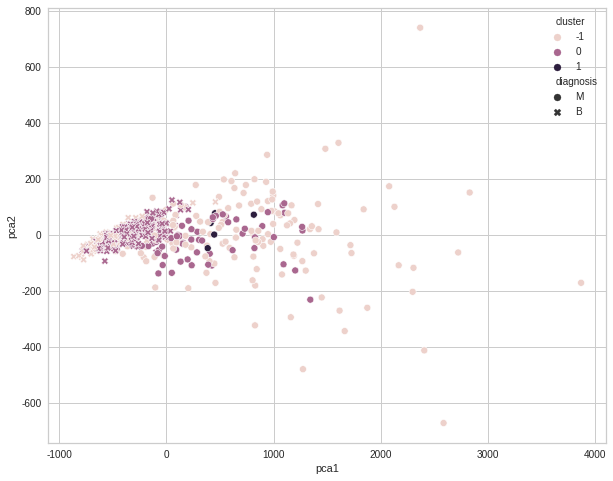

In [114]:
plt.figure(figsize=(10,8))

sns.scatterplot(x='pca1', y='pca2', hue='cluster', style='diagnosis', data=df); 
# 4차원 
# DBSCAN은 크게 2개 세그먼트로 분류하고, 아웃라이어는 -1로 처리